In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
df=pd.read_csv("data/bldgstories.txt",delimiter="\s+")
df.head()

,YEAR,HGHT,STORIES
0,1990,770,54
1,1980,677,47
2,1990,428,28
3,1989,410,38
4,1966,371,29


## Data Exploration

In [4]:
# Check the rows
df.shape

(60, 3)

In [5]:
# Check Null values
df.isnull().sum()

YEAR       0
HGHT       0
STORIES    0
dtype: int64

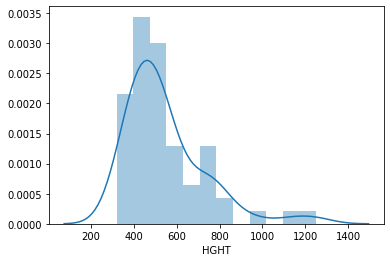

In [7]:
# Check distribution
sns.distplot(df["HGHT"])
plt.show()

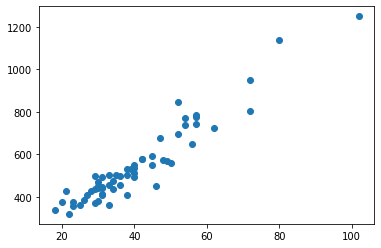

In [10]:
# Relation between height and stories
plt.scatter(df["STORIES"],df["HGHT"])
plt.show()

## Data Preprocessing

Predict the no. of stories a building can have based on its height.

In [11]:
x=df["HGHT"]
y=df["STORIES"]

In [12]:
# Convert DataFrame column to np array
x=df[["HGHT"]].values
y=df[["STORIES"]].values

In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(48, 1) (12, 1) (48, 1) (12, 1)


## Model Selection

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

# Train the model
linear_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
# Print the coefficients
print("Y Intercept b0:",linear_reg.intercept_)
print("Coefficient b1:",linear_reg.coef_)

Y Intercept b0: [-2.55635295]
Coefficient b1: [[0.07840212]]


In [19]:
# Lets get the Predicted Values Y
y_pred=linear_reg.predict(x_test)

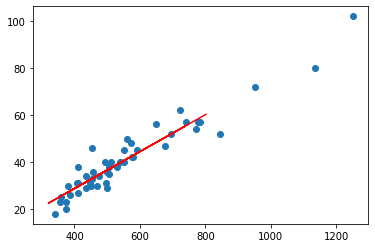

In [20]:
# Result validations
plt.scatter(x_train, y_train)
plt.plot(x_test,y_pred,color="red")
plt.show()

In [45]:
# Lets compare y_test and y_pred
df1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df1.shape

(12, 2)

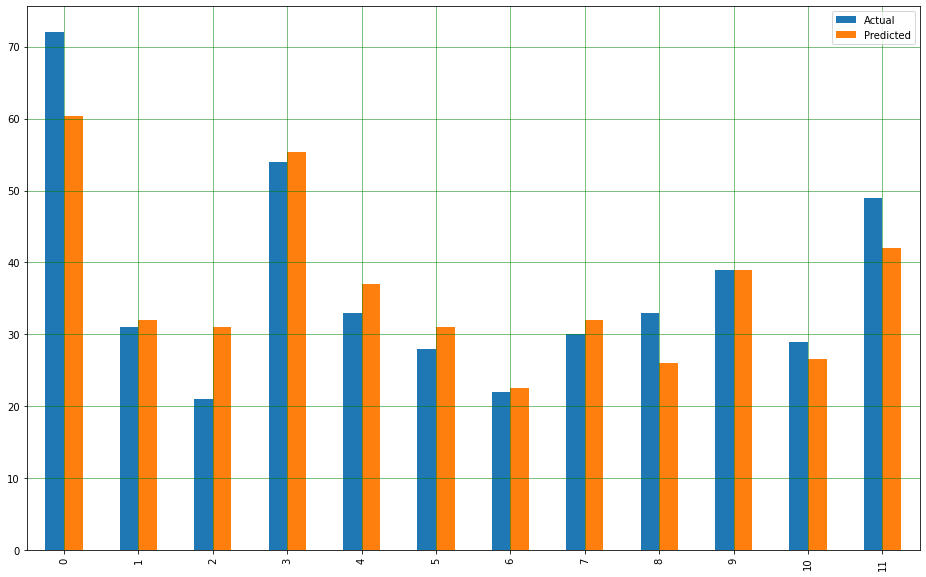

In [44]:
# Bar Chart
df2=df1.head(15)
df2.plot(kind="bar",figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

## Model Performance

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test,y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score: 0.844975133654873
Mean Absolute Error: 4.168725387421264
Mean Squared Error: 31.05987790918931
Root Mean Squared Error: 5.5731389637429025
